# This program plots 3D Mohr's Circles from stress tensors

* original code from author: nicoguaro @ https://gist.github.com/nicoguaro/d9a77d5a7819e801c5b4
* Modified by GeoStephanieRae
* Modifications include:
    * Plot only half circles
    * Circles transparent
    * Added gridlines
* Log data sourced from well in Vaca Muerta Fm (SPE-180965-MS)
* Added documentation


In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvalsh
from matplotlib import rcParams

In [2]:
plt.style.use('seaborn-white')

In [3]:
def plot_mohr3d(S):
    
    # eigenvalues for effective stress tensors
    S3, S2, S1 = eigvalsh(S)

    # calc radius & center of each circle
    R_maj = 0.5*(S1 - S3)  
    cent_maj = 0.5*(S1+S3)
    
    R_min = 0.5*(S2 - S3)
    cent_min = 0.5*(S2 + S3)
    
    R_mid = 0.5*(S1 - S2)
    cent_mid = 0.5*(S1 + S2)
    
    # specify params for each circle
    circ1 = plt.Circle((cent_maj,0), R_maj, facecolor='none', lw=1, 
                       edgecolor='g')
    circ2 = plt.Circle((cent_min,0), R_min, facecolor='none', lw=1,
                       edgecolor='b')
    circ3 = plt.Circle((cent_mid,0), R_mid, facecolor='none',lw=1,
                       edgecolor='r')
    # specify plot params
    plt.axis('scaled')
    ax = plt.gca()
    ax.add_artist(circ1)
    ax.add_artist(circ2)
    ax.add_artist(circ3)
    ax.set_xlim(50, 80) #S1 + .1*R_maj
    ax.set_ylim(0, 8) #1.5*R_maj
    ax.minorticks_on()
    ax.grid(axis='both',which='both')
    plt.xlabel(r"$\sigma$ (mpa)", size=12)
    plt.ylabel(r"$\tau$ (mpa)", size=12)
    #plt.savefig('Mohr_circle_3D.svg')
    plt.show()

In [4]:
# create 3x3 numpy arrays (effective stress tensors)
A = np.array([[67.8,0,0],[0,61.3,0],[0,0,59]])
C = np.array([[68.9,0,0],[0,61.9,0],[0,0,60.2]])  
D = np.array([[74,0,0],[0,66.1,0],[0,0,63.8]])
B = np.array([[72,0,0],[0,66.1,0],[0,0,62.6]])
E = np.array([[78.4,0,0],[0,66.4,0],[0,0,64.4]])

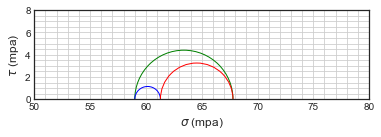

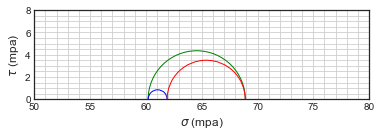

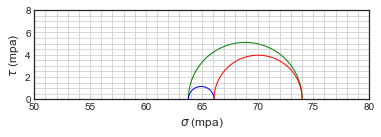

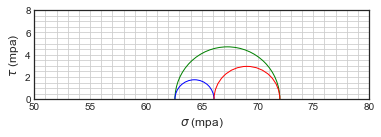

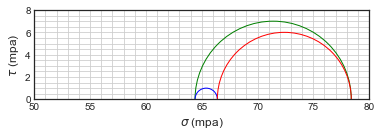

In [5]:
# plot Mohrs Circle Diagrams
plot_mohr3d(A)
plot_mohr3d(C)
plot_mohr3d(D)
plot_mohr3d(B)
plot_mohr3d(E)

In [6]:
# failed attempt to configure subplots

# fig=plt.figure.SubplotParams()
# ax1=fig.add_subplot(5,1,1)
# ax1.plot(plot_mohr3d(A))
# ax2=fig.add_subplot(5,1,2)
# ax2.plot(plot_mohr3d(C))
# ax3=fig.add_subplot(5,1,3)
# ax3.plot(plot_mohr3d(D))
# ax4=fig.add_subplot(5,1,4)
# ax4.plot(plot_mohr3d(B))
# ax4=fig.add_subplot(5,1,5)
# ax4.plot(plot_mohr3d(E))
# plt.show()